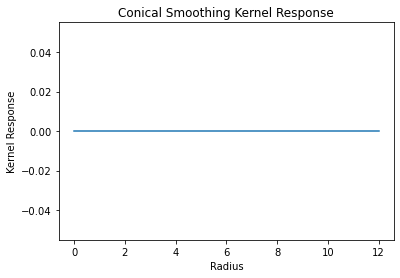

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace

# Define the size and shape of the kernel
kernel_size = 25
sigma = 3
radius = kernel_size // 2

# Create the conical smoothing kernel
kernel = gaussian_laplace(np.zeros((kernel_size, kernel_size)), sigma=sigma)
for i in range(kernel_size):
    for j in range(kernel_size):
        if np.sqrt((i-radius)**2 + (j-radius)**2) > radius:
            kernel[i,j] = 0

# Compute the response of the kernel as a function of radius
response = np.zeros((radius+1,))
for r in range(radius+1):
    response[r] = np.mean(kernel[np.sqrt((np.indices(kernel.shape) - radius)**2).sum(axis=0) <= r])

# Plot the response as a function of radius
radius_values = np.arange(len(response))
plt.plot(radius_values, response)
plt.xlabel('Radius')
plt.ylabel('Kernel Response')
plt.title('Conical Smoothing Kernel Response')
plt.show()

/var/folders/rh/7ph0_l8175q5nxjqr79w0qnx20yt01/T/ipykernel_24336/780298620.py:1: UserWarning: No contour levels were found within the data range.
  plt.contour(kernel)


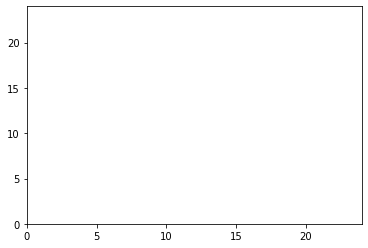

In [2]:
plt.contour(kernel)

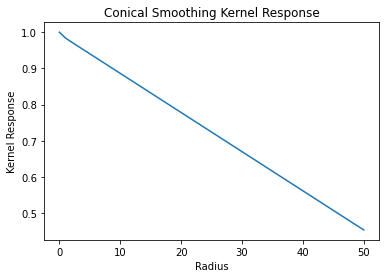

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg

# Define the size and shape of the kernel
kernel_size = 100
radius = kernel_size // 2

# Create the conical smoothing kernel
kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    for j in range(kernel_size):
        dist = np.sqrt((i - radius) ** 2 + (j - radius) ** 2)
        if dist <= radius:
            kernel[i, j] = 1 - dist / radius

# Compute the response of the kernel as a function of radius
response = np.zeros((radius + 1,))
for r in range(radius + 1):
    response[r] = np.mean(kernel[np.sqrt((np.indices(kernel.shape) - radius) ** 2).sum(axis=0) <= r])

# Plot the response as a function of radius
radius_values = np.arange(len(response))
plt.plot(radius_values, response)
plt.xlabel('Radius')
plt.ylabel('Kernel Response')
plt.title('Conical Smoothing Kernel Response')
plt.show()


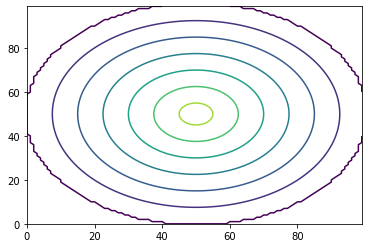

In [7]:
plt.contour(kernel)

In [29]:
arr=np.zeros( (300,300) )
arr[150,150]=1.

In [39]:
soo=sg.convolve2d( arr , kernel, mode='same' ) / np.sum(kernel)
soo2=sg.convolve2d( soo , kernel, mode='same' ) /np.sum(kernel)
soo3=sg.convolve2d( soo2 , kernel, mode='same' ) /np.sum(kernel)
soo4=sg.convolve2d( soo3 , kernel, mode='same' ) /np.sum(kernel)
soo5=sg.convolve2d( soo4 , kernel, mode='same' ) /np.sum(kernel)

In [31]:
print(np.shape(soo))

(300, 300)


1.0


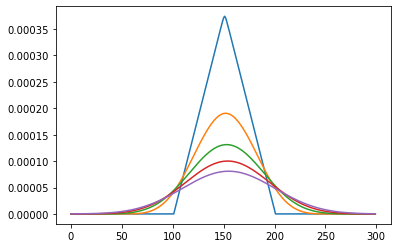

In [40]:
plt.plot(soo[150,:])
plt.plot(soo2[150,:])
plt.plot(soo3[150,:])
plt.plot(soo4[150,:])
plt.plot(soo5[150,:])


print(np.sum(soo2))